In [1]:
import pandas as pd

dataset = pd.read_csv("../datasets/penguins.csv")

feature_names = [
    "Culmen Length (mm)",
    "Culmen Depth (mm)",
    "Flipper Length (mm)",
]
target_name = "Body Mass (g)"

dataset = dataset[feature_names + [target_name]].dropna(axis="rows", how="any")
dataset = dataset.sample(frac=1, random_state=0).reset_index(drop=True)
data, target = dataset[feature_names], dataset[target_name]

In [2]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate

tree = DecisionTreeRegressor(random_state=0)
forest = RandomForestRegressor(random_state=0)

tree_cv_results = cross_validate(tree, data, target, cv=10, return_train_score=True)
forest_cv_results = cross_validate(forest, data, target, cv=10, return_train_score=True)


In [9]:
print(f"tree is better than forest in {sum([dif>0 for dif in tree_cv_results['test_score'] - forest_cv_results['test_score']])}/10 folds")

tree is better than forest in 0/10 folds


In [11]:
forest_5 = RandomForestRegressor(n_estimators=5, random_state=0)
forest_5_cv_results = cross_validate(forest, data, target, cv=10, return_train_score=True)

print(f"5 trees are better than 100 in {sum([dif>0 for dif in forest_5_cv_results['test_score'] - forest_cv_results['test_score']])}/10 folds")


5 trees are better than 100 in 0/10 folds


Text(0.5, 1.0, 'validation curve for n_estimators')

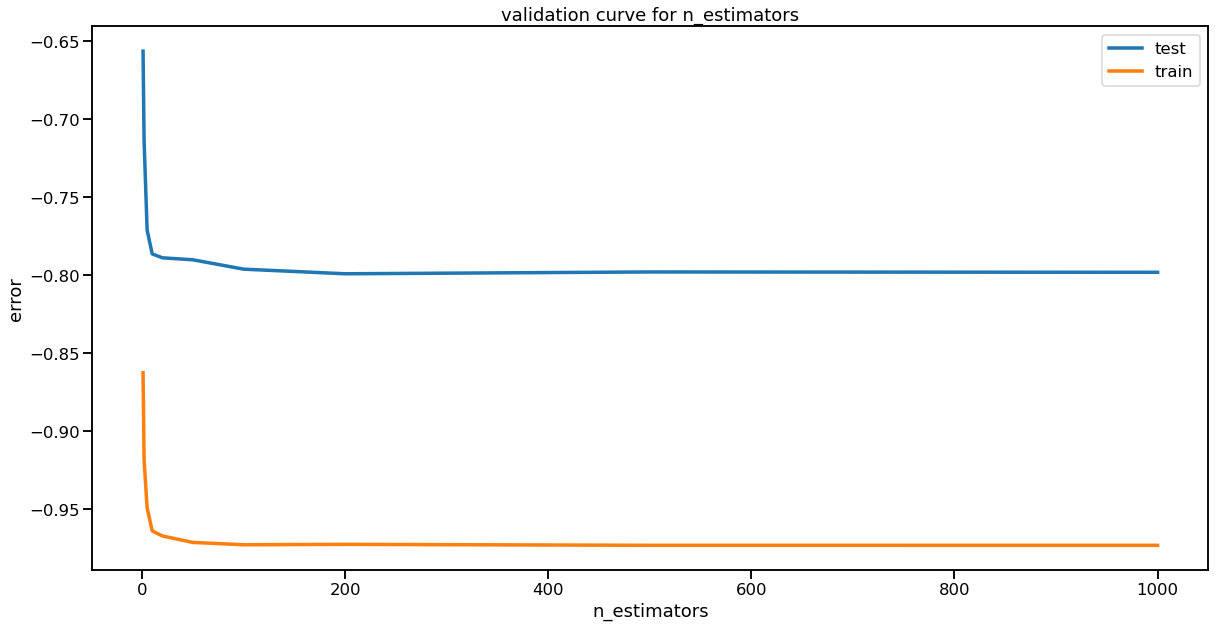

In [36]:
from sklearn.model_selection import validation_curve

n_estimators = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1_000]

train_scores_max_depth, test_scores_max_depth = validation_curve(RandomForestRegressor(), data, target, param_name='n_estimators', param_range=n_estimators)
import matplotlib.pyplot as plt

mean_train_errors = -train_scores_max_depth.mean(axis=1)
mean_test_errors = -test_scores_max_depth.mean(axis=1)
plt.figure(figsize=(20,10))
plt.plot(n_estimators, mean_test_errors, label='test')
plt.plot(n_estimators, mean_train_errors,label='train')
plt.legend()

plt.xlabel("n_estimators")
plt.ylabel("error")
plt.title("validation curve for n_estimators")

In [ ]:
n_estimators = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1_000]

train_scores_5_depth, test_scores_5_depth = validation_curve(RandomForestRegressor(max_depth=5), data, target, param_name='n_estimators', param_range=n_estimators)


Text(0.5, 1.0, 'validation curve for n_estimators with varying tree depth')

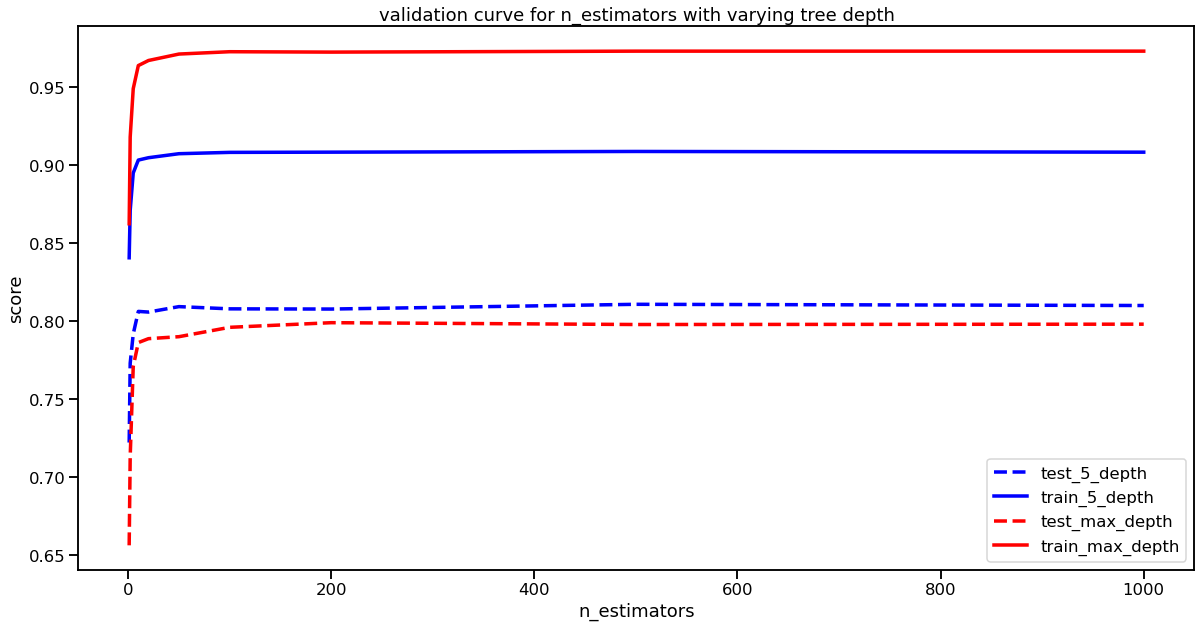

In [47]:
plt.figure(figsize=(20,10))

plt.plot(n_estimators, test_scores_5_depth.mean(axis=1), 'b--',label='test_5_depth')
plt.plot(n_estimators,train_scores_5_depth.mean(axis=1),'b',label='train_5_depth')

plt.plot(n_estimators, test_scores_max_depth.mean(axis=1),'r--', label='test_max_depth')
plt.plot(n_estimators,train_scores_max_depth.mean(axis=1),'r',label='train_max_depth')

plt.legend()

plt.xlabel("n_estimators")
plt.ylabel("score")
plt.title("validation curve for n_estimators with varying tree depth")

In [48]:
from sklearn.ensemble import HistGradientBoostingRegressor

max_iter = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1_000]

train_scores, test_scores = validation_curve(HistGradientBoostingRegressor(), data, target, param_name='max_iter', param_range=max_iter)

Text(0.5, 1.0, 'validation curve for max_iter')

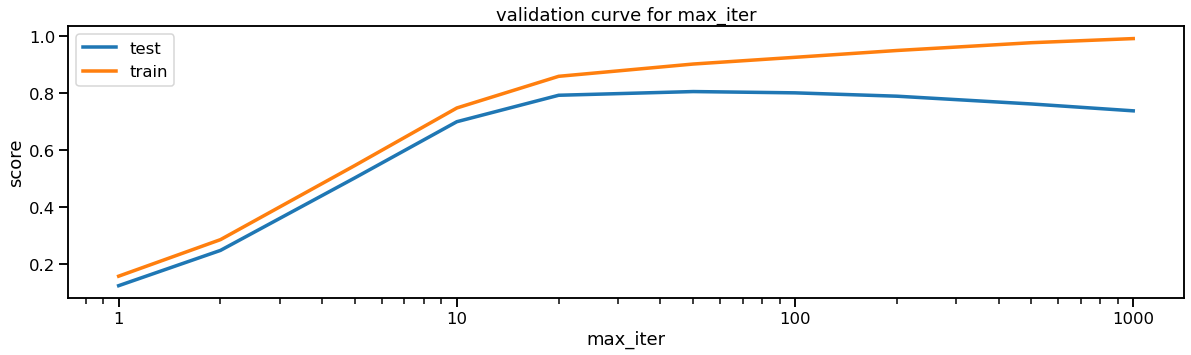

In [69]:
from matplotlib.ticker import ScalarFormatter
fig, ax = plt.subplots()
fig.set_size_inches(20,5)

ax.plot(max_iter, test_scores.mean(axis=1), label='test')
ax.plot(max_iter, train_scores.mean(axis=1),label='train')
plt.legend()

plt.xlabel("max_iter")
plt.xscale('log')
ax.xaxis.set_major_formatter(ScalarFormatter())

plt.ylabel("score")
plt.title("validation curve for max_iter")